In [693]:
!pip install findspark
!pip install pyspark

In [694]:
import findspark
findspark.init()


In [695]:
from pyspark import SparkContext

In [696]:
from pyspark.sql import SparkSession

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("CrimeDataAnalysis") \
    .getOrCreate()

# Now you can use the 'spark' variable to read CSV files or perform other Spark operations


#### **CHICAGO CRIME DATA**

In [697]:
from pyspark.sql.functions import to_timestamp,col,lit
read_csv = spark.read.csv('sample_data/crime.csv', header=True).withColumn('Date', to_timestamp(col('Date'), 'MM/dd/yyyy hh:mm:ss a'))
read_csv.show(5)


+--------+-----------+-------------------+-------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|              Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+-------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|12536164|   JE439378|2015-09-24 00:00:00|    031XX W 53RD PL|1753|OFFENSE INVOLVING...|SEXUAL ASSAULT OF...|           APARTMENT| false|    true|0923|     009|  14|            63|      02| 

**Schema Handling**

In [698]:
read_csv.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [699]:
from pyspark.sql.types import StructType, StructField, StringType, TimestampType, BooleanType, DoubleType, IntegerType

In [700]:
read_csv.columns

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

Just an example on how the type of Date (timestamp type has been changed to string). However, timestamp is the preferred data-type for the Date column.

In [701]:
labels= [('ID',StringType()),
('Date',StringType()),
('Block',StringType()),
('IUCR',StringType()),
('Primary Type',StringType()),
('Description',StringType()),
('Location Description',StringType()),
('Arrest',StringType()),
('Domestic', BooleanType()),
('Beat', StringType()),
('Ward',StringType()),
('FBI Code', StringType()),
('X Coordinate',StringType()),
('Y Coordinate',StringType()),
('Latitude', DoubleType()),
('Longitude', DoubleType()),
('Location', StringType())]

In [702]:
schema = StructType([StructField(x[0],x[1],True) for x in labels])


In [703]:
csv_df = spark.read.csv('sample_data/crime.csv', schema = schema)

In [704]:
csv_df.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



In [705]:
csv_df.show(5)

+--------+-----------+--------------------+-------------------+------------+--------------------+--------------------+--------------------+--------+--------+----+--------+------------+--------------+--------+---------+------------+
|      ID|       Date|               Block|               IUCR|Primary Type|         Description|Location Description|              Arrest|Domestic|    Beat|Ward|FBI Code|X Coordinate|  Y Coordinate|Latitude|Longitude|    Location|
+--------+-----------+--------------------+-------------------+------------+--------------------+--------------------+--------------------+--------+--------+----+--------+------------+--------------+--------+---------+------------+
|      ID|Case Number|                Date|              Block|        IUCR|        Primary Type|         Description|Location Description|    NULL|Domestic|Beat|District|        Ward|Community Area|    NULL|     NULL|Y Coordinate|
|12536164|   JE439378|09/24/2015 12:00:...|    031XX W 53RD PL|        1

**Showing column**

In [706]:
read_csv.select('IUCR').show(5)

+----+
|IUCR|
+----+
|1753|
|1754|
|1752|
|1752|
|1752|
+----+
only showing top 5 rows



In [707]:
read_csv.select(col('IUCR')).show(5)

+----+
|IUCR|
+----+
|1753|
|1754|
|1752|
|1752|
|1752|
+----+
only showing top 5 rows



**Showing multiple cols**

In [708]:
read_csv.select('IUCR', 'Primary Type', 'Domestic').show(5)

+----+--------------------+--------+
|IUCR|        Primary Type|Domestic|
+----+--------------------+--------+
|1753|OFFENSE INVOLVING...|    true|
|1754|OFFENSE INVOLVING...|    true|
|1752|OFFENSE INVOLVING...|    true|
|1752|OFFENSE INVOLVING...|    true|
|1752|OFFENSE INVOLVING...|    true|
+----+--------------------+--------+
only showing top 5 rows



**Add new column named NEW COL with all entries 1s**

In [709]:
from pyspark.sql.functions import lit

In [710]:
read_csv.withColumn('NEW COLUMN', lit(1)).show(5)

+--------+-----------+-------------------+-------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+----------+
|      ID|Case Number|               Date|              Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|NEW COLUMN|
+--------+-----------+-------------------+-------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+----------+
|12536164|   JE439378|2015-09-24 00:00:00|    031XX W 53RD PL|1753|OFFENSE INVOLVING...|SEXUAL ASSAULT OF...|           APARTMENT| false|    true|0923|     0

**Dropping column ` IUCR`**

In [711]:
read_csv.drop('IUCR').show(5)

+--------+-----------+-------------------+-------------------+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|              Block|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+-------------------+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|12536164|   JE439378|2015-09-24 00:00:00|    031XX W 53RD PL|OFFENSE INVOLVING...|SEXUAL ASSAULT OF...|           APARTMENT| false|    true|0923|     009|  14|            63|      02|        NULL|        

#### WORKING WITH ROWS

In [712]:
read_csv.select('Date').show(5)

+-------------------+
|               Date|
+-------------------+
|2015-09-24 00:00:00|
|2015-05-15 00:00:00|
|2015-06-18 00:00:00|
|2015-08-30 00:00:00|
|2015-01-12 12:00:00|
+-------------------+
only showing top 5 rows



Filtering on Date

In [713]:
one_day_crime_df = read_csv.filter(col('Date').contains('2015-01-12'))
one_day_crime_df.count()



608

In [714]:
one_day_crime_df.show(5)

+--------+-----------+-------------------+-------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|              Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+-------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|12998264|   JG171087|2015-01-12 12:00:00|   0000X E 122ND ST|1752|OFFENSE INVOLVING...|AGGRAVATED CRIMIN...|           RESIDENCE|

In [715]:
one_day_crime_df.count()

608

In [716]:
read_csv.count()

264840

In [717]:
new_df = read_csv.union(one_day_crime_df)

In [718]:
new_df.count()

265448

In [719]:
new_df.orderBy('Date',ascending = False ).show(5)

+--------+-----------+-------------------+--------------------+----+---------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|   Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+---------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10365064|   HZ100370|2015-12-31 23:59:00| 075XX S EMERALD AVE|1320|CRIMINAL DAMAGE|          TO VEHICLE|              STREET| false|   false|

In [720]:
crime_type = read_csv.select('Primary Type').distinct()

In [721]:
crime_type.count()


33

In [722]:
crime_type_list = crime_type.select('Primary Type').collect()
crime_list = [row['Primary Type'] for row in crime_type_list]
print(crime_list)

['OFFENSE INVOLVING CHILDREN', 'CRIMINAL SEXUAL ASSAULT', 'STALKING', 'PUBLIC PEACE VIOLATION', 'OBSCENITY', 'ARSON', 'GAMBLING', 'CRIMINAL TRESPASS', 'ASSAULT', 'NON - CRIMINAL', 'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT', 'THEFT', 'BATTERY', 'ROBBERY', 'HOMICIDE', 'PUBLIC INDECENCY', 'CRIM SEXUAL ASSAULT', 'HUMAN TRAFFICKING', 'INTIMIDATION', 'PROSTITUTION', 'DECEPTIVE PRACTICE', 'CONCEALED CARRY LICENSE VIOLATION', 'SEX OFFENSE', 'CRIMINAL DAMAGE', 'NARCOTICS', 'NON-CRIMINAL', 'OTHER OFFENSE', 'KIDNAPPING', 'BURGLARY', 'WEAPONS VIOLATION', 'OTHER NARCOTIC VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER']


**Top 10 number of reported crimes by Primary type in descending order of occurance**

In [723]:
new_df.groupBy('Primary Type').count().orderBy('count', ascending=False).show(10)

+-------------------+-----+
|       Primary Type|count|
+-------------------+-----+
|              THEFT|57499|
|            BATTERY|49015|
|    CRIMINAL DAMAGE|28734|
|          NARCOTICS|24004|
|      OTHER OFFENSE|17613|
|            ASSAULT|17083|
| DECEPTIVE PRACTICE|16497|
|           BURGLARY|13220|
|MOTOR VEHICLE THEFT|10089|
|            ROBBERY| 9664|
+-------------------+-----+
only showing top 10 rows



Percentage of Reported Crime that resulted in arrest


In [724]:
new_df.select('Arrest').distinct().show()

+------+
|Arrest|
+------+
| false|
|  true|
+------+



In [725]:
new_df.select('Arrest').printSchema()

root
 |-- Arrest: string (nullable = true)



In [726]:
new_df.filter(col('Arrest')=='true').count()/new_csv.select('Arrest').count()

0.26463940206744824

Top 3 locations for reported crimes

In [727]:
new_df.groupBy('Location Description').count().orderBy('count', ascending=False).show(3)

+--------------------+-----+
|Location Description|count|
+--------------------+-----+
|              STREET|60896|
|           RESIDENCE|41984|
|           APARTMENT|35153|
+--------------------+-----+
only showing top 3 rows



Built-In Functions

In [728]:
from pyspark.sql import functions
print(dir(functions))

['Any', 'ArrayType', 'Callable', 'Column', 'DataFrame', 'DataType', 'Dict', 'Iterable', 'JVMView', 'List', 'Optional', 'PandasUDFType', 'PySparkTypeError', 'PySparkValueError', 'SparkContext', 'StringType', 'StructType', 'TYPE_CHECKING', 'Tuple', 'Type', 'Union', 'UserDefinedFunction', 'UserDefinedTableFunction', 'ValuesView', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_create_column_from_literal', '_create_lambda', '_create_py_udf', '_create_py_udtf', '_from_numpy_type', '_get_jvm_function', '_get_lambda_parameters', '_invoke_binary_math_function', '_invoke_function', '_invoke_function_over_columns', '_invoke_function_over_seq_of_columns', '_invoke_higher_order_function', '_options_to_str', '_test', '_to_java_column', '_to_seq', '_unresolved_named_lambda_variable', 'abs', 'acos', 'acosh', 'add_months', 'aes_decrypt', 'aes_encrypt', 'aggregate', 'any_value', 'approxCountDistinct', 'approx_count_distinct', 'approx_percentil

Example: Display PRIMARY DESCRIPTION column in Lower, Upper and first four substring

In [729]:
from pyspark.sql.functions import lower, upper, substring


In [730]:
help(substring)

Help on function substring in module pyspark.sql.functions:

substring(str: 'ColumnOrName', pos: int, len: int) -> pyspark.sql.column.Column
    Substring starts at `pos` and is of length `len` when str is String type or
    returns the slice of byte array that starts at `pos` in byte and is of length `len`
    when str is Binary type.
    
    .. versionadded:: 1.5.0
    
    .. versionchanged:: 3.4.0
        Supports Spark Connect.
    
    Notes
    -----
    The position is not zero based, but 1 based index.
    
    Parameters
    ----------
    str : :class:`~pyspark.sql.Column` or str
        target column to work on.
    pos : int
        starting position in str.
    len : int
        length of chars.
    
    Returns
    -------
    :class:`~pyspark.sql.Column`
        substring of given value.
    
    Examples
    --------
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(substring(df.s, 1, 2).alias('s')).collect()
    [Row(s='ab')]



In [731]:
new_df.select(lower(col('Primary Type')), upper('Primary Type'), substring(col('Primary Type'),1,4)).show(5)

+--------------------+--------------------+-----------------------------+
| lower(Primary Type)| upper(Primary Type)|substring(Primary Type, 1, 4)|
+--------------------+--------------------+-----------------------------+
|offense involving...|OFFENSE INVOLVING...|                         OFFE|
|offense involving...|OFFENSE INVOLVING...|                         OFFE|
|offense involving...|OFFENSE INVOLVING...|                         OFFE|
|offense involving...|OFFENSE INVOLVING...|                         OFFE|
|offense involving...|OFFENSE INVOLVING...|                         OFFE|
+--------------------+--------------------+-----------------------------+
only showing top 5 rows



**Working with Dates**
> - Show the oldest date and most recent date
> - What is 3 days earlier than the oldest date and 3 days later than the most recent date ?

User-defined functions

In [732]:
 from pyspark.sql.functions import  min, max


In [733]:
new_df.select(min(col('Date')), max(col('Date'))).show(1)

+-------------------+-------------------+
|          min(Date)|          max(Date)|
+-------------------+-------------------+
|2015-01-01 00:00:00|2015-12-31 23:59:00|
+-------------------+-------------------+



In [734]:
from pyspark.sql.functions import date_add, date_sub

In [735]:
help(date_add)

Help on function date_add in module pyspark.sql.functions:

date_add(start: 'ColumnOrName', days: Union[ForwardRef('ColumnOrName'), int]) -> pyspark.sql.column.Column
    Returns the date that is `days` days after `start`. If `days` is a negative value
    then these amount of days will be deducted from `start`.
    
    .. versionadded:: 1.5.0
    
    .. versionchanged:: 3.4.0
        Supports Spark Connect.
    
    Parameters
    ----------
    start : :class:`~pyspark.sql.Column` or str
        date column to work on.
    days : :class:`~pyspark.sql.Column` or str or int
        how many days after the given date to calculate.
        Accepts negative value as well to calculate backwards in time.
    
    Returns
    -------
    :class:`~pyspark.sql.Column`
        a date after/before given number of days.
    
    Examples
    --------
    >>> df = spark.createDataFrame([('2015-04-08', 2,)], ['dt', 'add'])
    >>> df.select(date_add(df.dt, 1).alias('next_date')).collect()
    [Ro

In [736]:
new_df.select(date_sub(min(col('Date')),3), date_add(max(col('Date')),3)).show(1)

+----------------------+----------------------+
|date_sub(min(Date), 3)|date_add(max(Date), 3)|
+----------------------+----------------------+
|            2014-12-29|            2016-01-03|
+----------------------+----------------------+



**Join Example**

Reported Crime dataset has only the distict number, now add the district name using the police station dataset using join

In [737]:
police_station_data = spark.read.csv("sample_data/police_station.csv", header=True)
police_station_data.show(5)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|    DISTRICT|DISTRICT NAME|            ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        NULL|        NULL|        NULL| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 1172080.029| 1908086.527|41.90324165|-87.64335214|(41.9032416531, -

In [738]:

from pyspark.sql.functions import col

# Assuming you have a PySpark DataFrame named 'df'

# Remove rows with value 'xyz' in a specific column
police_station_data = police_station_data.filter(col('DISTRICT') != 'Headquarters')

# Show the DataFrame after filtering
police_station_data.show()


+--------+--------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|DISTRICT| DISTRICT NAME|             ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|
+--------+--------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|      18|    Near North|  1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 1172080.029| 1908086.527|41.90324165|-87.64335214|(41.9032416531, -...|
|      19|     Town Hall|    850 W Addison St|Chicago|   IL|60613|http://home.chica...|312-744-8320|312-744-4481|312-744-8011| 1169730.744| 1924160.317|41.94740046|-87.65151202|(41.9474004564, -...|
|    

In [739]:
police_station_data.select('DISTRICT').distinct().show(50)

+--------+
|DISTRICT|
+--------+
|       7|
|      15|
|      11|
|       3|
|       8|
|      22|
|      16|
|       5|
|      18|
|      17|
|       6|
|      19|
|      25|
|      24|
|       9|
|       1|
|      20|
|      10|
|       4|
|      14|
|       2|
+--------+



In [740]:
new_df.select(col('District')).distinct().show(50)

+--------+
|District|
+--------+
|     009|
|     012|
|     024|
|     031|
|     015|
|     006|
|     019|
|     020|
|     011|
|     025|
|     005|
|     003|
|     016|
|     018|
|     008|
|     022|
|     001|
|     014|
|     010|
|     004|
|     017|
|     007|
|     002|
+--------+



In [741]:
from pyspark.sql.functions import lpad

In [742]:
help(lpad)

Help on function lpad in module pyspark.sql.functions:

lpad(col: 'ColumnOrName', len: int, pad: str) -> pyspark.sql.column.Column
    Left-pad the string column to width `len` with `pad`.
    
    .. versionadded:: 1.5.0
    
    .. versionchanged:: 3.4.0
        Supports Spark Connect.
    
    Parameters
    ----------
    col : :class:`~pyspark.sql.Column` or str
        target column to work on.
    len : int
        length of the final string.
    pad : str
        chars to prepend.
    
    Returns
    -------
    :class:`~pyspark.sql.Column`
        left padded result.
    
    Examples
    --------
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(lpad(df.s, 6, '#').alias('s')).collect()
    [Row(s='##abcd')]



In [743]:
police_station_data.select(lpad(col('DISTRICT'),3,'0')).show()

+--------------------+
|lpad(DISTRICT, 3, 0)|
+--------------------+
|                 018|
|                 019|
|                 020|
|                 022|
|                 024|
|                 025|
|                 001|
|                 002|
|                 003|
|                 004|
|                 005|
|                 006|
|                 007|
|                 008|
|                 009|
|                 010|
|                 011|
|                 014|
|                 015|
|                 016|
+--------------------+
only showing top 20 rows



In [744]:
ps = police_station_data.withColumn('FormattedDistrict', lpad(col('DISTRICT'),3,'0'))

In [745]:
police_station_data.columns

['DISTRICT',
 'DISTRICT NAME',
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION']

In [746]:
ps.show(5)

+--------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+-----------------+
|DISTRICT|DISTRICT NAME|            ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|FormattedDistrict|
+--------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+-----------------+
|      18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 1172080.029| 1908086.527|41.90324165|-87.64335214|(41.9032416531, -...|              018|
|      19|    Town Hall|   850 W Addison St|Chicago|   IL|60613|http://home.chica...|312-744-8320|312-744-4481|312-744-8011| 1169730.744| 19

In [747]:
police_station_data.show(5)

+--------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|DISTRICT|DISTRICT NAME|            ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|
+--------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|      18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 1172080.029| 1908086.527|41.90324165|-87.64335214|(41.9032416531, -...|
|      19|    Town Hall|   850 W Addison St|Chicago|   IL|60613|http://home.chica...|312-744-8320|312-744-4481|312-744-8011| 1169730.744| 1924160.317|41.94740046|-87.65151202|(41.9474004564, -...|
|      20|     

In [748]:
new_df.join(ps, new_df.District == ps.FormattedDistrict, 'left_outer').drop(
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION', 'FormattedDistrict').show(5)

+--------+-----------+-------------------+-------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+-------------+
|      ID|Case Number|               Date|              Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|Year|          Updated On|DISTRICT|DISTRICT NAME|
+--------+-----------+-------------------+-------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+-------------+
|12536164|   JE439378|2015-09-24 00:00:00|    031XX W 53RD PL|1753|OFFENSE INVOLVING...|SEXUAL ASSAULT OF...|           APARTMENT| false|    true|0923|     009|  14|            63|      02|2015|09/14/2023 03:41:...|       9|      Deering|
|13188119|   JG397237|2015-05-15 00:00:00|  

### Frequently reported non-criminal activity

In [749]:
new_df.cache()
new_df.show()

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|12536164|   JE439378|2015-09-24 00:00:00|     031XX W 53RD PL|1753|OFFENSE INVOLVING...|SEXUAL ASSAULT OF...|           APARTM

In [750]:
new_df.select('Primary Type').distinct().count()

33

In [751]:
new_df.select('Primary Type').distinct().show(35)

+--------------------+
|        Primary Type|
+--------------------+
|OFFENSE INVOLVING...|
|CRIMINAL SEXUAL A...|
|            STALKING|
|PUBLIC PEACE VIOL...|
|           OBSCENITY|
|               ARSON|
|            GAMBLING|
|   CRIMINAL TRESPASS|
|             ASSAULT|
|      NON - CRIMINAL|
|LIQUOR LAW VIOLATION|
| MOTOR VEHICLE THEFT|
|               THEFT|
|             BATTERY|
|             ROBBERY|
|            HOMICIDE|
|    PUBLIC INDECENCY|
| CRIM SEXUAL ASSAULT|
|   HUMAN TRAFFICKING|
|        INTIMIDATION|
|        PROSTITUTION|
|  DECEPTIVE PRACTICE|
|CONCEALED CARRY L...|
|         SEX OFFENSE|
|     CRIMINAL DAMAGE|
|           NARCOTICS|
|        NON-CRIMINAL|
|       OTHER OFFENSE|
|          KIDNAPPING|
|            BURGLARY|
|   WEAPONS VIOLATION|
|OTHER NARCOTIC VI...|
|INTERFERENCE WITH...|
+--------------------+



In [752]:
new_df.groupBy('Location Description').count().orderBy('count', ascending=False).show(3)

+--------------------+-----+
|Location Description|count|
+--------------------+-----+
|              STREET|60896|
|           RESIDENCE|41984|
|           APARTMENT|35153|
+--------------------+-----+
only showing top 3 rows



In [753]:
non_criminal = new_df.filter((col('Primary Type')=='NON-CRIMINAL') | (col('Primary Type')=='NON - CRIMINAL'))
non_criminal.show(50, truncate=False)

+--------+-----------+-------------------+----------------------+----+--------------+-------------------------------------------+----------------------------------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+-----------------------------+
|ID      |Case Number|Date               |Block                 |IUCR|Primary Type  |Description                                |Location Description                          |Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On            |Latitude    |Longitude    |Location                     |
+--------+-----------+-------------------+----------------------+----+--------------+-------------------------------------------+----------------------------------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+----

In [754]:
from os import truncate
non_criminal.groupBy(col('Description')).count().orderBy('count', ascending=False).show(truncate=False)

+-------------------------------------------+-----+
|Description                                |count|
+-------------------------------------------+-----+
|FOID - REVOCATION                          |21   |
|LOST PASSPORT                              |11   |
|CONCEALED CARRY LICENSE REVOCATION         |1    |
|FOUND PASSPORT                             |1    |
|GUN OFFENDER NOTIFICATION-NO CONTACT       |1    |
|NOTIFICATION OF STALKING - NO CONTACT ORDER|1    |
+-------------------------------------------+-----+



#### Which Day of the Week Has the Most Reported Crime !

In [755]:
from pyspark.sql.functions import dayofweek, date_format

In [756]:
help(dayofweek)

Help on function dayofweek in module pyspark.sql.functions:

dayofweek(col: 'ColumnOrName') -> pyspark.sql.column.Column
    Extract the day of the week of a given date/timestamp as integer.
    Ranges from 1 for a Sunday through to 7 for a Saturday
    
    .. versionadded:: 2.3.0
    
    .. versionchanged:: 3.4.0
        Supports Spark Connect.
    
    Parameters
    ----------
    col : :class:`~pyspark.sql.Column` or str
        target date/timestamp column to work on.
    
    Returns
    -------
    :class:`~pyspark.sql.Column`
        day of the week for given date/timestamp as integer.
    
    Examples
    --------
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(dayofweek('dt').alias('day')).collect()
    [Row(day=4)]



In [757]:
new_csv.select(col('Date'), dayofweek(col('Date'))).show(5)

+-------------------+---------------+
|               Date|dayofweek(Date)|
+-------------------+---------------+
|2015-09-24 00:00:00|              5|
|2015-05-15 00:00:00|              6|
|2015-06-18 00:00:00|              5|
|2015-08-30 00:00:00|              1|
|2015-01-12 12:00:00|              2|
+-------------------+---------------+
only showing top 5 rows



In [758]:
from pyspark.sql.functions import  date_format

In [759]:
help(date_format)

Help on function date_format in module pyspark.sql.functions:

date_format(date: 'ColumnOrName', format: str) -> pyspark.sql.column.Column
    Converts a date/timestamp/string to a value of string in the format specified by the date
    format given by the second argument.
    
    A pattern could be for instance `dd.MM.yyyy` and could return a string like '18.03.1993'. All
    pattern letters of `datetime pattern`_. can be used.
    
    .. _datetime pattern: https://spark.apache.org/docs/latest/sql-ref-datetime-pattern.html
    
    .. versionadded:: 1.5.0
    
    .. versionchanged:: 3.4.0
        Supports Spark Connect.
    
    Notes
    -----
    Whenever possible, use specialized functions like `year`.
    
    Parameters
    ----------
    date : :class:`~pyspark.sql.Column` or str
        input column of values to format.
    format: str
        format to use to represent datetime values.
    
    Returns
    -------
    :class:`~pyspark.sql.Column`
        string value repres

In [760]:
new_df.select(col('Date'), dayofweek(col('Date')), date_format(col('Date'),'E')).show(5)

+-------------------+---------------+--------------------+
|               Date|dayofweek(Date)|date_format(Date, E)|
+-------------------+---------------+--------------------+
|2015-09-24 00:00:00|              5|                 Thu|
|2015-05-15 00:00:00|              6|                 Fri|
|2015-06-18 00:00:00|              5|                 Thu|
|2015-08-30 00:00:00|              1|                 Sun|
|2015-01-12 12:00:00|              2|                 Mon|
+-------------------+---------------+--------------------+
only showing top 5 rows



In [761]:
day_count_df = new_df.groupBy(date_format(col('Date'),'E')).count().orderBy('count', ascending=False)

In [762]:
day_count_df.show()

+--------------------+-----+
|date_format(Date, E)|count|
+--------------------+-----+
|                 Fri|39154|
|                 Thu|38473|
|                 Sat|38087|
|                 Mon|37730|
|                 Wed|37480|
|                 Sun|37419|
|                 Tue|37105|
+--------------------+-----+



In [763]:
day_count_df = day_count_df.withColumnRenamed('date_format(Date, E)', 'Day')

# Show the DataFrame after renaming the column
day_count_df.show()

+---+-----+
|Day|count|
+---+-----+
|Fri|39154|
|Thu|38473|
|Sat|38087|
|Mon|37730|
|Wed|37480|
|Sun|37419|
|Tue|37105|
+---+-----+



In [764]:
# Convert Spark DataFrame to Pandas DataFrame
day_count_df_pandas = day_count_df.toPandas()

# Show the Pandas DataFrame
print(day_count_df_pandas)


   Day  count
0  Fri  39154
1  Thu  38473
2  Sat  38087
3  Mon  37730
4  Wed  37480
5  Sun  37419
6  Tue  37105


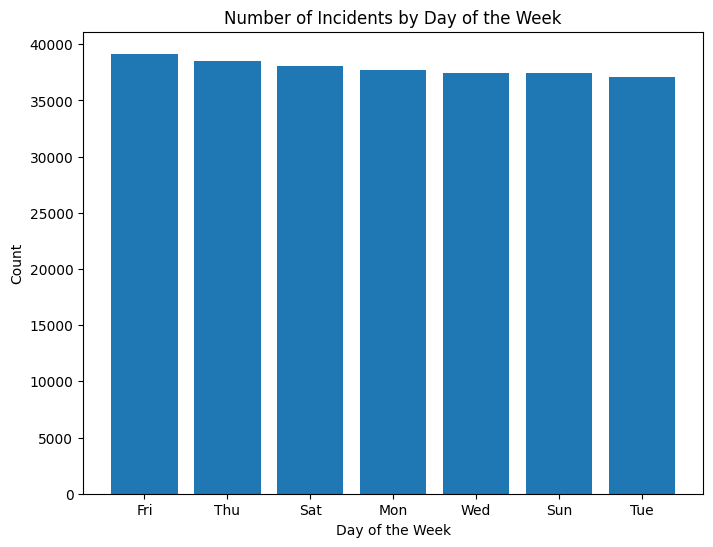

In [765]:
import matplotlib.pyplot as plt

# Convert Spark DataFrame to Pandas DataFrame
day_count_df_pandas = day_count_df.toPandas()



# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(day_count_df_pandas['Day'], day_count_df_pandas['count'])
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Number of Incidents by Day of the Week')
plt.show()


#### **RDD SETUP**

In [777]:
from pyspark import SparkContext

# Initialize SparkContext
sc = SparkContext.getOrCreate()

# Read text file into RDD
police_station_rdd = sc.textFile('sample_data/police_station.csv')


In [778]:
police_station_rdd.first()

'DISTRICT,DISTRICT NAME,ADDRESS,CITY,STATE,ZIP,WEBSITE,PHONE,FAX,TTY,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION'

In [787]:
police_station_rdd.show(5)

AttributeError: 'RDD' object has no attribute 'show'

In [779]:
ps_header = police_station_rdd.first()

In [783]:
ps_rest = police_station_rdd.filter(lambda line: line != ps_header)
ps_rest.first()

'Headquarters,Headquarters,3510 S Michigan Ave,Chicago,IL,60653,http://home.chicagopolice.org,,,,1177731.401,1881697.404,41.83070169,-87.62339535,"(41.8307016873, -87.6233953459)"'

How many police stations ?

In [785]:
ps_rest.map(lambda line: line.split(',')).count()

22

Display the District ID, District Name, Address and Zip for the police station with District ID 7

In [786]:
ps_rest.filter(lambda line: line.split(',')[0]=='7').map(lambda line: (line.split(',')[0],
                                                                       line.split(',')[1],
                                                                       line.split(',')[2],
                                                                       line.split(',')[5])).collect()

[('7', 'Englewood', '1438 W 63rd St', '60636')]

Police station 10 and 11 are geographically close to each other. Display the District ID, District Name, and address and zip code

In [788]:
ps_rest.filter(lambda line: line.split(',')[0] in ['10', '11']).map(lambda line: (line.split(',')[0],
                                                                       line.split(',')[1],
                                                                       line.split(',')[2],
                                                                       line.split(',')[5])).collect()

[('10', 'Ogden', '3315 W Ogden Ave', '60623'),
 ('11', 'Harrison', '3151 W Harrison St', '60612')]